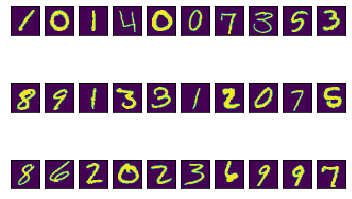

In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from helper_functions import show_images, show_images_by_digit, fit_random_forest_classifier2 
from helper_functions import fit_random_forest_classifier, do_pca, plot_components

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#read in our dataset
train = pd.read_csv('./data/train.csv')

# save the labels to a Pandas series target
y = train['label']

# Drop the label feature
train.fillna(0, inplace=True)
X = train.drop("label",axis=1)

show_images(30)

In [5]:
pca, X_pca = do_pca(15, X)

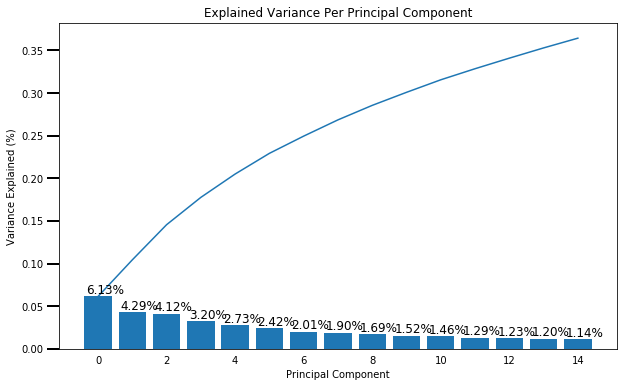

In [6]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
    

scree_plot(pca)

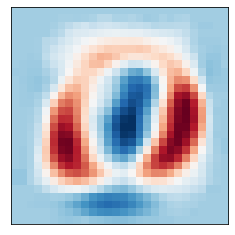

In [14]:
def plot_component(pca, comp):
    '''
    Plots an image associated with each component to understand how the weighting 
    of the components 
    INPUT: 
          pca - pca object created from PCA in sklearn
          comp - int - the component you want to see starting at 0
    OUTPUT
          None
    '''
    if comp <= len(pca.components_):
        mat_data = np.asmatrix(pca.components_[comp]).reshape(28,28)  #reshape images
        plt.imshow(mat_data, cmap='RdBu_r'); #plot the data
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) #removes numbered labels on y-axis   
    else:
        print('That is not the right input, please read the docstring before continuing.')
        
#Plot the first component
plot_component(pca, 0)

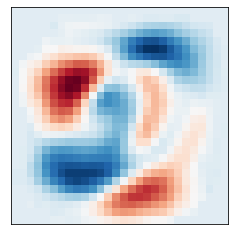

In [15]:
plot_component(pca, 1)

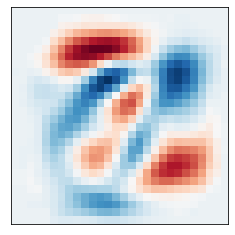

In [16]:
plot_component(pca, 2)

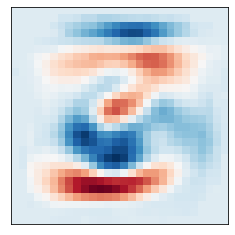

In [17]:
plot_component(pca, 3)

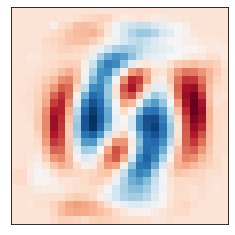

In [18]:
plot_component(pca, 4)

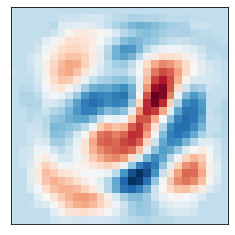

In [19]:
plot_component(pca, 5)

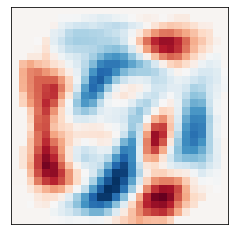

In [20]:
plot_component(pca, 6)

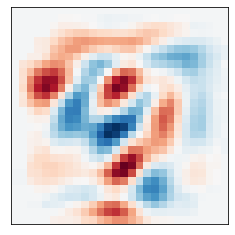

In [21]:
plot_component(pca, 7)

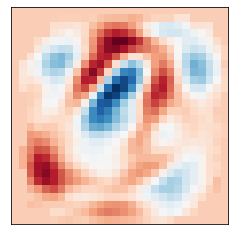

In [22]:
plot_component(pca, 8)

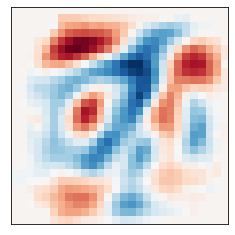

In [23]:
plot_component(pca, 9)

([], <a list of 0 Text yticklabel objects>)

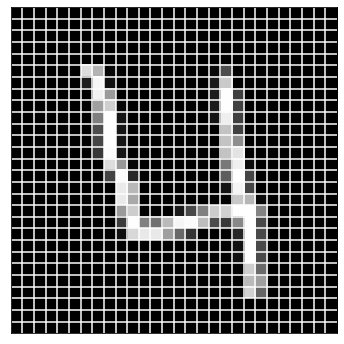

In [24]:
digit_4 = train.iloc[3,1:].values.reshape(28,28)
plt.figure(figsize=[6,6])
plt.imshow(digit_4, cmap='gray'); #plot the data
plt.hlines(np.arange(-0.5, 27.5), -.5, 27.5, colors='w')
plt.vlines(np.arange(-0.5, 27.5), -.5, 27.5, colors='w')
plt.xticks([]) #removes numbered labels on x-axis
plt.yticks([]) #removes numbered labels on y-axis 